<a href="https://colab.research.google.com/github/smrahman1/computer-vision-bootcamp/blob/master/WARG_CV_Bootcamp.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Epoch 1/17
1563/1563 [==============================] - 187s 119ms/step - loss: 1.6727 - accuracy: 0.3976
Epoch 2/17
1563/1563 [==============================] - 191s 122ms/step - loss: 1.3049 - accuracy: 0.5422
Epoch 3/17
1563/1563 [==============================] - 192s 123ms/step - loss: 1.1541 - accuracy: 0.5997
Epoch 4/17
1563/1563 [==============================] - 192s 123ms/step - loss: 1.0646 - accuracy: 0.6292
Epoch 5/17
1563/1563 [==============================] - 191s 122ms/step - loss: 0.9966 - accuracy: 0.6546
Epoch 6/17
1563/1563 [==============================] - 187s 120ms/step - loss: 0.9352 - accuracy: 0.6751
Epoch 7/17
1563/1563 [==============================] - 186s 119ms/step - loss: 0.8888 - accuracy: 0.6915
Epoch 8/17
1563/1563 [==============================] - 178s 114ms/step - loss: 0.8466 - accuracy: 0.7063
Epoch 9/17
1563/1563 [==============================] - 172s 110ms/step - loss: 0.8052 - accuracy: 0.7191
Epoch 10/17
1563/1563 [=======================

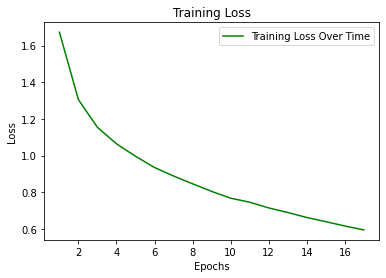

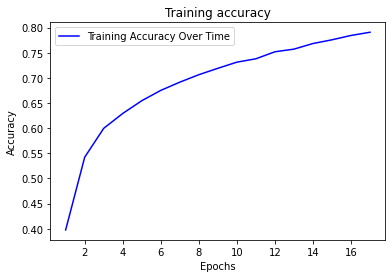

313/313 [==============================] - 9s 28ms/step - loss: 0.8997 - accuracy: 0.7034
Validation loss:  0.8996905088424683 
Validation Accuracy:  70.34000158309937 %


In [7]:
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf


def main():
  # CONSTANTS
  BATCH_SIZE = 32
  EPOCHS = 17

  xTrain, yTrain, xTest, yTest = loading_data()
  model = training_model(xTrain)

  # Compile model
  model.compile(loss="sparse_categorical_crossentropy", optimizer = "adam", metrics = ["accuracy"])

  # Fit the model and store it in a variable
  historyTrain = model.fit(xTrain, yTrain, batch_size = BATCH_SIZE, epochs = EPOCHS)

  # Plots and Testing Model Accuracy
  plot_data(historyTrain, EPOCHS, model, xTest, yTest)

def loading_data():
  # Distributing data into variables
  dataSet = tf.keras.datasets.cifar10
  (xTrain, yTrain), (xTest, yTest) = dataSet.load_data()

  # Normalizing data so that the data is organized and on a common scale. 
  # This helps the model converge quicker.
  xTrain = tf.keras.utils.normalize(xTrain, axis = 1)
  xTest = tf.keras.utils.normalize(xTest, axis = 1)
  return xTrain, yTrain, xTest, yTest

def training_model(xTrain):
  # Input layer, Convolutional Layer with 128 Filters and Pooling Layer
  model = tf.keras.models.Sequential()
  model.add(tf.keras.layers.Conv2D(64, (3,3), input_shape = xTrain.shape[1:]))
  model.add(tf.keras.layers.Activation("relu"))
  model.add(tf.keras.layers.MaxPooling2D(pool_size=(2,2)))
  model.add(tf.keras.layers.Dropout(0.2))

  # Second layer, Convolutional Layer with 64 Filters and Pooling Layer
  model.add(tf.keras.layers.Conv2D(128, (3,3)))
  model.add(tf.keras.layers.Activation("relu"))
  model.add(tf.keras.layers.MaxPooling2D(pool_size=(2,2)))
  model.add(tf.keras.layers.Dropout(0.2))

  # Third layer, Dense Layer with 128 Filters
  model.add(tf.keras.layers.Flatten())
  model.add(tf.keras.layers.Dense(128))
  model.add(tf.keras.layers.Activation("relu"))

  # Output layer, Dense Layer with softmax activation
  model.add(tf.keras.layers.Dense(10))
  model.add(tf.keras.layers.Activation("softmax"))
  
  return model

def plot_data(historyTrain, EPOCHS, model, xTest, yTest):
  # Plots and Testing Model Accuracy

  lossTrain = historyTrain.history['loss']
  accTrain = historyTrain.history['accuracy']
  epochs = range(1, EPOCHS+1)


  plt.plot(epochs, lossTrain, 'g', label='Training Loss Over Time')
  plt.title('Training Loss')
  plt.xlabel('Epochs')
  plt.ylabel('Loss')
  plt.legend()
  plt.show()

  plt.plot(epochs, accTrain, 'b', label='Training Accuracy Over Time')
  plt.title('Training accuracy')
  plt.xlabel('Epochs')
  plt.ylabel('Accuracy')
  plt.legend()
  plt.show()

  valLoss, valAcc = model.evaluate(xTest, yTest)
  print("Validation loss: ", valLoss, "\nValidation Accuracy: ", valAcc*100, "%")

main()
